<a href="https://colab.research.google.com/github/it-22-2019/PPPO_IT22_2019_Arsenic_Andrijana/blob/main/PPPO_IT22_2019_Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Leaf classification**

**Student:** Andrijana Arsenić IT22/2019




**Predmet:** Principi prezentacije i prepoznavanja oblika

## **Sadržaj**

> 1. Uvod
2. Opis projektnog zadatka
3. Realizacija zadatka
4. Zaključak
5. Reference





# **1. Uvod**

>


Mašinsko učenje predstavlja granu veštačke inteligencije koja se bavi tehnikama i metodama koje omogućavaju da računari i druge mašine uče na osnovu iskustva, bez eksplicitnog programiranja. Jednostavnije rečeno, mašinsko učenje se zasniva na ideji da postoje generički algoritmi koji nam mogu reći nešto interesantno o skupu podataka, a da pritom ne moramo da napišemo poseban kod za taj problem. Podaci se ubace u generički algoritam i on napravi svoju logiku na osnovu podataka.

Neki od problema na koje je mašinsko učenje uspešno primenjeno su prepoznavanje lica na slikama, prepoznavanje različitih objekata na slikama i videu, prepoznavanje tumora na medicinskim snimcima, autonomna vožnja automobila, autonomno letenje, igranje igara na tabli poput šaha i igre go, ali i računarskih igara kao što je Super Mario ili Doom klasifikacija teksta, mašinsko prevodenje, automatsko opisivanje sadržaja slika, analiza osećanja izraženih u tekstu, predvidanje razvoja bolesti kod pacijenata i preporučivanje terapije, analiza društvenih mreža, prepoznavanje i sinteza govora i tako dalje. U mnogim od ovih primena, mašinsko učenje je već prevazišlo nivo efikasnosti ljudskih eksperata. Sve nabrojane primene predstavljaju očigledno primere važnih praktičnih problema, ali iza svih stoji i ozbiljna teorija. Možda je upravo ovaj spoj ključ uspeha mašinskog učenja.

Obično se identifikuju tri grupe problema mašinskog učenja, a to su problemi nadgledanog učenja (eng. supervised learning), problemi nenadgledanog učenja (eng. unsupervised learning) i problemi učenja potkrepljivanjem (eng. reinforcement learning). [1] [5]

# **2. Opis projektnog zadatka**

>

Klasifikacija fotografija je osnovni zadatak mašinskog učenja koji pokušava da shvati celu sliku kao celinu. Cilj je klasifikovati sliku dodeljivanjem određenoj etiketi. Klasifikacija slika se obično odnosi na slike na kojima se pojavljuje i analizira samo jedan objekat. Otkrivanje objekata uključuje i zadatke klasifikacije i lokalizacije i koristi se za analizu realističnih slučajeva u kojima više objekata može postojati na slici.

Za realizaciju zadatka koristi se dataset koji se nalazi na sledećoj lokaciji:

https://drive.google.com/file/d/1r4yy2ZIUGoyESydQzY39L-0s8ld7fuXr/view?usp=sharing

Dobijeni dataset se sastoji od:



*   **images** foldera - obuhvata slike koje se koriste za treniranje modela. U ovom folderu se nalazi 1584 slika.
*   **sample_submission.csv**  - primer kako bi trebalo da izgleda format kao rešenje zadatka
*   **train.csv** -



U projektu sam koristila 5 algoritama za klasifikaciju:

1. SGD Classifier
2. Random Forest Classifier
3. XGB Classifier
4. KNeighbors Classifier
SVM






# **3. Realizacija zadatka**


> Prvi korak je bio učitavanje dataset-a postavljenog na Google Drive-u koji je potreban za izradu projektnog zadatka.



In [1]:
!pip install gdown

In [2]:
import gdown

url = ' https://drive.google.com/uc?id=1r4yy2ZIUGoyESydQzY39L-0s8ld7fuXr'
output = '/content/datasetleafclass.zip'

gdown.download(url, output, quiet=False)

Downloading...
From:  https://drive.google.com/uc?id=1r4yy2ZIUGoyESydQzY39L-0s8ld7fuXr
To: /content/datasetleafclass.zip
100%|██████████| 36.0M/36.0M [00:00<00:00, 58.2MB/s]


'/content/datasetleafclass.zip'

In [3]:
!unzip /content/datasetleafclass.zip -d /content/datasetleafclass

Archive:  /content/datasetleafclass.zip
  inflating: /content/datasetleafclass/images.zip  
  inflating: /content/datasetleafclass/sample_submission.csv.zip  
  inflating: /content/datasetleafclass/test.csv.zip  
  inflating: /content/datasetleafclass/train.csv.zip  


Uvezla sam potrebne biblioteke za obradu podataka.

* **Numpy** nam omogućava rad s
višedimenzionalnim nizovima.
* **Pandas** se koristi za manipulaciju i analizu podataka.
* **Os** biblioteka, s druge strane, služi za manipulaciju direktorijumima. Ovo uključuje kreiranje i brisanje direktorijuma, preuzimanje sadržaja direktorijuma i pronalaženje trenutnog radnog direktorijuma.

>

Nakon uvoza ovih biblioteka, koristili smo ***os*** biblioteku kako bismo generisali nazive datoteka u strukturi direktorijuma.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/datasetleafclass'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/datasetleafclass/train.csv.zip
/content/datasetleafclass/images.zip
/content/datasetleafclass/test.csv.zip
/content/datasetleafclass/sample_submission.csv.zip



> U narednim koracima ostali fajlovi su unzipovani iz glavnog direktorijuma.




In [5]:
import zipfile

with zipfile.ZipFile('/content/datasetleafclass/sample_submission.csv.zip') as z_samp:
  z_samp.extractall()

In [6]:
import zipfile

with zipfile.ZipFile('/content/datasetleafclass/images.zip') as z_samp:
  z_samp.extractall()

In [7]:
import zipfile

with zipfile.ZipFile('/content/datasetleafclass/test.csv.zip') as z_samp:
  z_samp.extractall()

In [8]:
import zipfile

with zipfile.ZipFile('/content/datasetleafclass/train.csv.zip') as z_samp:
  z_samp.extractall()



> Pomoću sledeće metode ispisujemo nazive fajlova koji se nalaze u direktorijumu.



In [9]:
os.listdir()

['.config',
 'datasetleafclass',
 'datasetleafclass.zip',
 'test.csv',
 'sample_submission.csv',
 'train.csv',
 'images',
 'sample_data']

In [10]:
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 200.4 kB/s eta 0:00:00


In [11]:
len(os.listdir('images'))

1584



> U narednom koraku instalirana je biblioteka ***Matplotlib*** za kreiranje statističkih, animiranih i interaktivnih vizuelizacija, u ovom slučaju za iscrtavanje dijagrama.



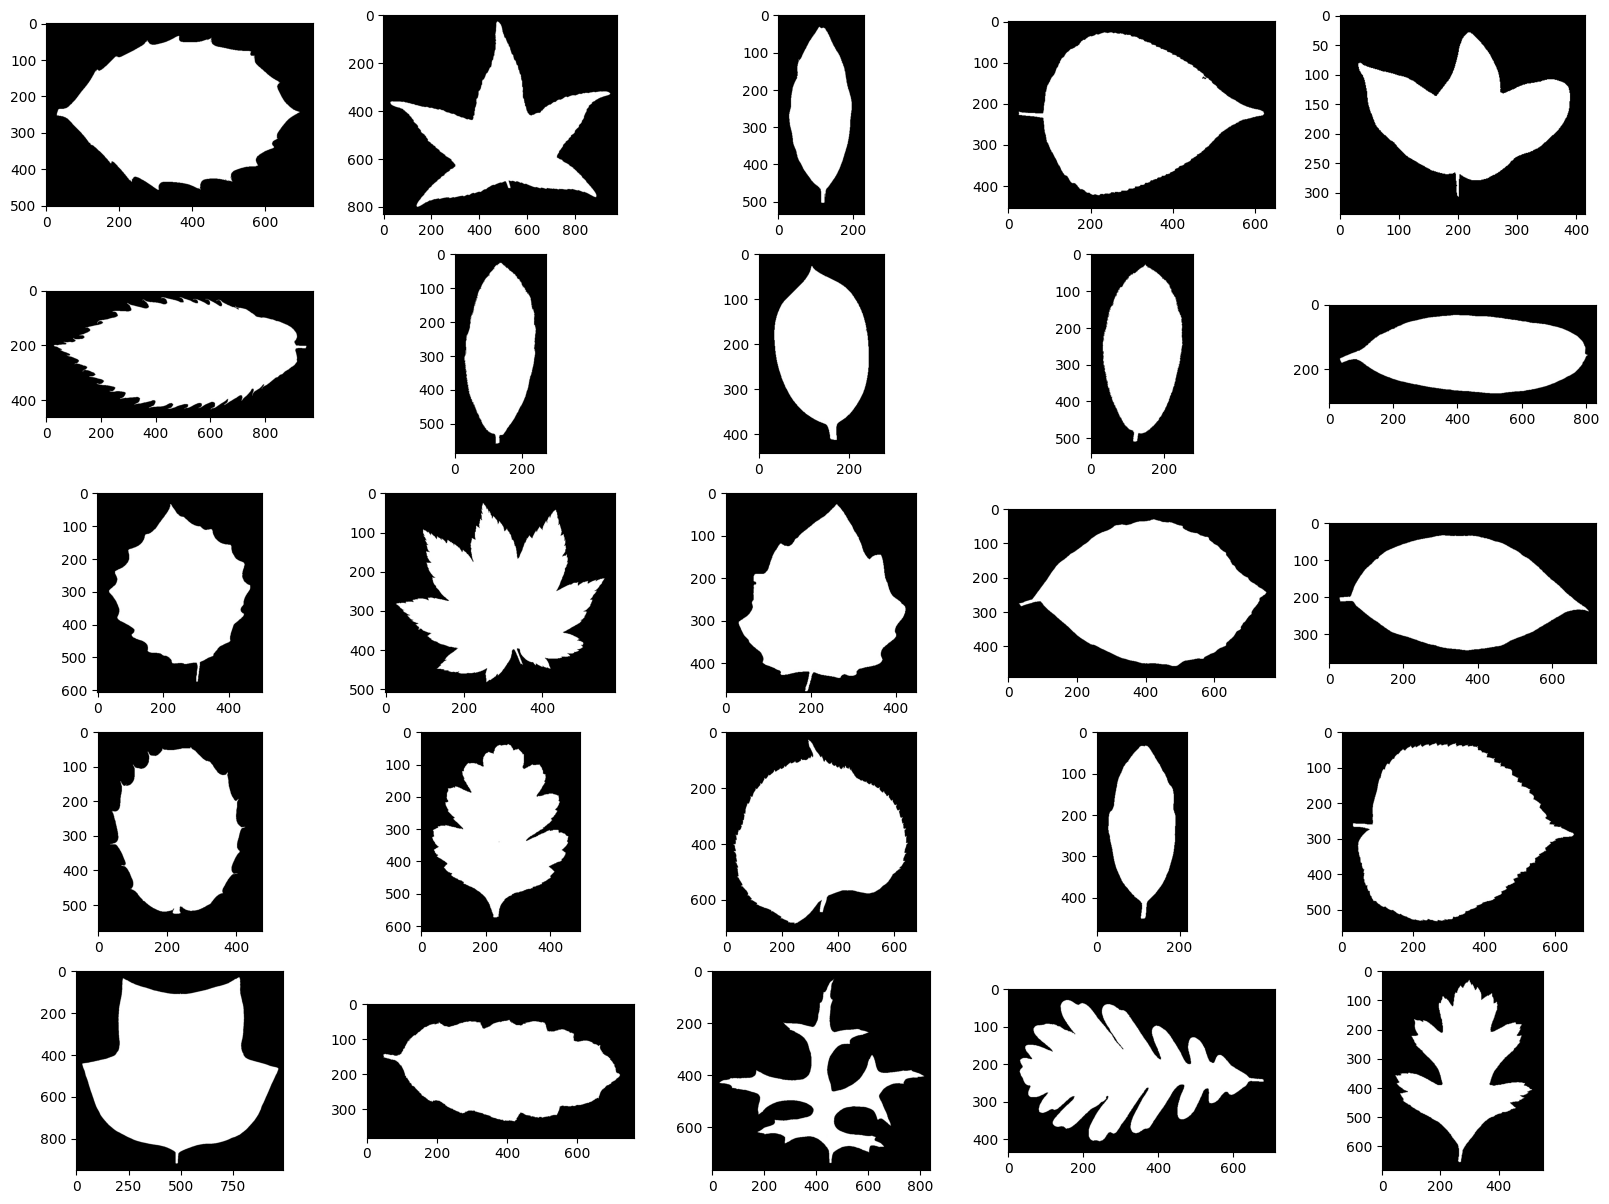

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from keras_preprocessing.image import load_img
for i in range(25):
  j=np.random.choice((os.listdir('images')))#nasumicno generise uzorak iz foldera
  plt.subplot(5,5,i+1)#pomocu subplota mogu se iscrtati vise dijagrama na jednoj slici i prima tri argumenta
  img=load_img(os.path.join('images', j))
  plt.imshow(img)



> Pomoću ***pandas*** biblioteke sam iščitala podatke iz *train.csv* i *test.csv* fajlova.


In [13]:
df=pd.read_csv('train.csv', index_col=False) #ne koristi se prva kolona kao index
dftest=pd.read_csv('test.csv' ,index_col=False)

In [14]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [15]:
dftest

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555




> Zatim sam uvezla dve biblioteke:

*   **LabelEncoder** - koristi se za konvertovanje kvalitativnih podataka u numeričke vrednosti, kao što su kategorije unutar kolone *species* iz ***train.csv*** datoteke.
*   **StratifiedShuffleSplit** - koristi se za podelu podataka na trening i test skupove, uz očuvanje odnosa između klasa ili kategorija u ciljnom atributu.





In [16]:
from pandas.core.dtypes.common import classes
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

encoder=LabelEncoder()
le=encoder.fit(df.species)#dodeljuje atribut classes koji sadrži samo jedinstvene vrednosti
labels=le.transform(df.species)#vrši transformaciju u nove kategoričke podatke
classes=list(le.classes_)

In [17]:
print(classes)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [18]:
print(dftest.columns)

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)




> Pomoću sledeće komande uklonila sam *id* i *species* red iz ***train.csv*** fajla.



In [19]:
df=df.drop(['id','species'],axis=1)#briše redove id i species, axios=1 predstavlja prvu kolonu
test_id=dftest.id
dftest=dftest.drop(['id'],axis=1)

In [20]:
dftest

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,0.023438,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB


In [22]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB


In [23]:
print(f'Labels:',len(labels))

Labels: 990


In [24]:
uniquelabels=np.unique(labels)
print(uniquelabels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]




> Vršimo podelu podataka na trening i test skupove koristeći ***train_test_split*** biblioteku.

> *X_train* i *y_train* predstavljaju trening podatke i ciljne vrednosti za trening, dok *X_test* i *y_test* predstavljaju test podatke i ciljne vrednosti za testiranje.
> Argumenti:

* **df**: Ulazni podaci
* **labels**: Ciljni vektor ili ciljni atribut
* **test_size**: Veličina testnog skupa
* **shuffle**: True za nasumičnu podelu podataka, False ako želimo fiksni redosled
* **stratify**: Kako su podaci podeljeni



In [25]:
# Split into validation (test) and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df,labels,test_size=0.20,shuffle=True,stratify=labels)

## **SGD Classifier**


> **SGD** (*Stochastic Gradient Descent*) je algoritam za treniranje linearnih klasifikatora kao što su *Support Vector Machine* (SVM) i Logistička regresija. Koristi stohastički gradijentni spust (stohastička aproksimacija gradijentnog spusta) za optimizaciju funkcije greške tokom procesa treniranja. Ovaj proces uključuje iterativno računanje gradijenta funkcije greške i ažuriranje modela promenom parametara kako bi se minimizovala ova funkcija.

> **Stohastički gradijentni spust** je nazvan "stohastički" jer se gradijent ne izračunava nad celim skupom podataka, već samo nad malim podskupom podataka tokom svake iteracije.



In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
model_1 = make_pipeline(StandardScaler(), SGDClassifier())

print(model_1.fit(X_train,y_train))

print(model_1.score(X_test,y_test))


y_pred = model_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
0.9797979797979798
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


## **Random Forest Classifier**


> **Random Forest**, poznat i kao nasumična suma, je nadgledani algoritam mašinskog učenja koji konstruiše ansambl stabala odlučivanja. Stablo odlučivanja se formira u obliku drveta koje se sastoji od čvorova i grana. Svaka grana vodi do čvora, a svaki čvor predstavlja uslov za vrednosti atributa instance. Kroz prolazak kroz ovo stablo, algoritam određuje klasu instance tako što proverava vrednosti njenih atributa i putuje kroz čvorove sve dok ne stigne do lista koji dodeljuje instanci određenu klasu.



In [27]:
from sklearn.ensemble import RandomForestClassifier
model_2 = make_pipeline(StandardScaler(), RandomForestClassifier())

print(model_2.fit(X_train,y_train))

print(model_2.score(X_test,y_test))

y_pred = model_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])
0.98989898989899
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


## **KNeighbors Classifier**


> **KNeighborsClassifier** je algoritam za nadgledano mašinsko učenje koji se koristi za klasifikaciju podataka. Ovaj algoritam pripada grupi algoritama koji se nazivaju "k-najbližih suseda" (k-nearest neighbors - KNN).

Osnovna ideja iza **KNN** algoritma je da novoj instanci (nepoznatom uzorku) dodeli klasu na osnovu većine klasa njenih "najbližih suseda" u skupu za obuku. "Najbliži susedi" su odabrani na osnovu sličnosti između atributa instance.

Za klasifikator biblioteke sklearn defaultna vrednost broja suseda koji se razmatraju je 5.




In [28]:
from sklearn import neighbors
model_3 = make_pipeline(StandardScaler(), neighbors.KNeighborsClassifier())

print(model_3.fit(X_train,y_train))

print(f'score Model:',model_3.score(X_test,y_test))

y_pred = model_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])
score Model: 0.9696969696969697
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


## **XGB Classifier**


> **XGB** je jak i popularan algoritam koji je poboljšanje klasičnog gradijentnog pojačavanja (*Gradient Boosting*). On koristi ansambl tehniku u kojoj se kombinuje veliki broj slabih modela (obično drveća odlučivanja) kako bi se formirao snažan model. Glavna ideja XGB-a je minimiziranje funkcije gubitka, tako da se postiže bolja tačnost klasifikacije.



In [29]:
import xgboost as xgb
model_4 = make_pipeline(StandardScaler(),xgb.XGBClassifier())

print(model_4.fit(X_train,y_train))

print(f'score Model:',model_4.score(X_test,y_test))

y_pred = model_4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_esti

## **SVM**


> Osnovna ideja iza **SVM**-a je pronalaženje hiper-ravni (u dvodimenzionalnom prostoru, to je prava linija) koja najbolje razdvaja podatke različitih klasa. "Najbolje" u ovom kontekstu znači da hiper-ravan treba da ima maksimalni razmak između najbližih tačaka različitih klasa, što se naziva "maksimalni razmak".

Ovaj algoritam je posebno moćan za rešavanje problema sa jasno definisanim granicama između klasa i za rad sa linearno i nelinearno separabilnim podacima.



In [30]:
from sklearn import svm
model_5= make_pipeline(StandardScaler(),svm.SVC(gamma=0.001, C=100.))

print(model_5.fit(X_train,y_train))

print(f'score Model:',model_5.score(X_test,y_test))

y_pred = model_5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.001))])
score Model: 1.0
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [31]:
models = pd.DataFrame({
    'Model': ['SGDClassifier','Random Forest Classifier','K Neighbors Classifier', 'XGB Classifier',
              'svm'],

    'Score': [model_1.score(X_test,y_test)*100,
              model_2.score(X_test,y_test)*100,
              model_3.score(X_test,y_test)*100,
              model_4.score(X_test,y_test)*100,
              model_5.score(X_test,y_test)*100]})
models.sort_values(by='Score', ascending=True)

,Model,Score
3,XGB Classifier,90.404040
2,K Neighbors Classifier,96.969697
0,SGDClassifier,97.979798
1,Random Forest Classifier,98.989899
4,svm,100.000000


In [32]:
test_pred = model_5.predict(dftest)


In [33]:
print(test_pred)

[51 50  1 19 14  3  3 28 84  8 43 74 75 10 52 46 45 73 13 71 61 68 57 77
  1 70 28 15 35 70 53 74 47 50  4 36 14 55 36 93  8 32  8  9 71 70 38 23
 94 18 17  5 55 94 14 86 62 33 51 98 88 56 21 59 65 11 48  5 13  4 54 57
 29  7 31 98 92 84 25 10 61 43 85 24  1  2 23 83 40 22 48 90 25 21 37 56
 41 95  7 89 98 77  3 12 31 84 53 96 64 72 93 93 67 30  8 88 60 87  6 57
 34 90 60 17 75 27 51 31 39 23 68  2 41 61 24 97 29 28 68 81 42 51 86 62
 60 52 95 64 42 96 95 20 59 35 86  1 26 38 43 75 20 60 46 79 22 79 69 87
 65 97 75 21 29 21 11 10 58 94 27 22 15 45 89 54 43  5 23 94 40 49 89 72
 36 11 81 95 18 91 29 64 80  6 78 45 28  9 78 90 44 89 92 13  2 59  0 96
 70 32 29 78 91 55 44 38  5 60 49 58 94 67 92 88 90 79 25 37 18  0 76 27
 70 71 44 70 32 90 30 82 34 30 82 96 48 65 57 64 26 53 55 73  9  3 83 26
 30 63 17 22 79 63 12 78 36 14 27 25 67 38 20 54 76 69 67 97 80 44 92 69
 23 21 16 51 33 77 16 11 97  1 52 39 24 52 42 17  2 73 96 83 88  9 63 50
 16 38 87 95  3 35 83 60 59 58  0 50 62 38 93 68 55

In [34]:
sample_df=pd.read_csv('sample_submission.csv',index_col=False)
print(sample_df)

       id  Acer_Capillipes  Acer_Circinatum  Acer_Mono  Acer_Opalus  \
0       4         0.010101         0.010101   0.010101     0.010101   
1       7         0.010101         0.010101   0.010101     0.010101   
2       9         0.010101         0.010101   0.010101     0.010101   
3      12         0.010101         0.010101   0.010101     0.010101   
4      13         0.010101         0.010101   0.010101     0.010101   
..    ...              ...              ...        ...          ...   
589  1576         0.010101         0.010101   0.010101     0.010101   
590  1577         0.010101         0.010101   0.010101     0.010101   
591  1579         0.010101         0.010101   0.010101     0.010101   
592  1580         0.010101         0.010101   0.010101     0.010101   
593  1583         0.010101         0.010101   0.010101     0.010101   

     Acer_Palmatum  Acer_Pictum  Acer_Platanoids  Acer_Rubrum  Acer_Rufinerve  \
0         0.010101     0.010101         0.010101     0.010101     

In [35]:
output = pd.DataFrame({'Id': test_id,

                       'Labels': test_pred})
output.to_csv('submission.csv', index=False)
output.head()

,Id,Labels
0,4,51
1,7,50
2,9,1
3,12,19
4,13,14


In [36]:
final=pd.concat([output,sample_df],axis=1)
final.head()

,Id,Labels,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,51,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,50,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,1,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,19,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
4,13,14,13,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101


# **4. Zaključak**


> U suprotnosti sa sistemima koji izvršavaju zadatke na osnovu preciznih pravila, mašinsko učenje uči iz iskustva i primera. Za razliku od strogih pravila koja će svaki put primenjivati zadatke na isti način, mašinsko učenje ima tendenciju da se unapređuje kako se sve više podataka unosi u algoritam.

> Mašinsko učenje je fascinantno zbog svoje sposobnosti da se približi efikasnosti ljudskog učenja, kao i nastojanja da ga objasni putem teorijskih modela. Postoji niz ključnih pitanja u oblasti mašinskog učenja, kao što su:

* ***Šta se može naučiti i pod kojim uslovima?***: Ovo pitanje se odnosi na granice mašinskog učenja i šta je moguće postići pomoću ovih tehnika u različitim situacijama.

* ***Koji su algoritmi prikladni za različite probleme?***: Različite vrste problema zahtevaju različite algoritme mašinskog učenja. Identifikacija pravog algoritma za datu situaciju ključna je za uspešno rešavanje problema.

> Mašinsko učenje se bavi različitim vrstama zadataka učenja koji se često sreću u praksi. Neki od najčešćih zadataka učenja uključuju klasifikaciju (razdvajanje podataka u različite klase) i detekciju (identifikacija određenih obrazaca ili anomalija u podacima).



# **5. Reference**



> [1] **M. Nikolić, A. Zečević.** *Mašinsko učenje*. Beograd, 2019. (http://ml.matf.bg.ac.rs/readings/ml.pdf)

> [2] **Dubravko Ćulibrk(2012)** *Otkrivanje znanja iz podataka: Odabrana poglavlja*. Fort Lauderdale, USA: CreateSpace Independent Publishing Platform.

> [3] **Kabir, Fasihul, et al**.(2015) *Bangla text document categorization using stochastic gradient descent (sgd) classifier.* 2015 International Conference on Cognitive Computing and Information Processing (CCIP)

> [4] **Pal, Mahesh.** (2005) *Random forest classifier for remote sensing classification*

> [5] **Afifah, Khansa, Intan Nurma Yulita, and Indra Sarathan** (2021) *Sentiment Analysis on Telemedicine App Reviews using XGBoost Classifier*

> [6] (Online) *Najjednostavniji uvod u mašinsko učenje na svetu* -> https://startit.rs/masinsko-ucenje-je-zabavno/



